In [17]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
import collections
import itertools 
import logging
import coloredlogs
import math
import os
import re
import time
import itertools
import numpy as np
import matplotlib

from scipy import stats
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
import collections
import math
import os
import re
import itertools
import numpy as np

logger = logging.getLogger(__name__)
coloredlogs.CHROOT_FILES = []
coloredlogs.install(level=logging.INFO, use_chroot=False)

def unique_justseen(iterable, key=None):
    "List unique elements, preserving order. Remember only the element just seen."
    # unique_justseen('AAAABBBCCDAABBB') --> A B C D A B
    # unique_justseen('ABBCcAD', str.lower) --> A B C A D
    return list(map(next, map(lambda x: x[1], itertools.groupby(iterable, key))))

def bins(iterable, nbins=1, key=lambda x: x, ceil_bin=False):
    vals = [key(x) for x in iterable]
    min_v = min(vals)
    max_v = max(vals)
    bin_size = ((1 + max_v - min_v) / float(nbins))
    bin_size = math.ceil(bin_size) if ceil_bin else bin_size
    bins = [[] for _ in range(nbins)]
    for c in iterable:
        cv = key(c)
        cbin = int((cv - min_v) / bin_size)
        bins[cbin].append(c)
    return bins

# D-CN relation

In [2]:
# CLASS NUMBERS OF IMAGINARY QUADRATIC FIELDS
# http://www.ams.org/journals/mcom/2004-73-246/S0025-5718-03-01517-5/S0025-5718-03-01517-5.pdf
D_DB = [
    (1, 9, 163), (21, 85, 61483), (41, 109, 296587), (61, 132, 606643), (81, 228, 1030723),
    (2, 18, 427), (22, 139, 85507), (42, 339, 280267), (62, 323, 647707), (82, 402, 1446547),
    (3, 16, 907), (23, 68, 90787), (43, 106, 300787), (63, 216, 991027), (83, 150, 1074907),
    (4, 54, 1555), (24, 511, 111763), (44, 691, 319867), (64, 1672, 693067), (84, 1715, 1225387),
    (5, 25, 2683), (25, 95, 93307), (45, 154, 308323), (65, 164, 703123), (85, 221, 1285747),
    (6, 51, 3763), (26, 190, 103027), (46, 268, 462883), (66, 530, 958483), (86, 472, 1534723),
    (7, 31, 5923), (27, 93, 103387), (47, 107, 375523), (67, 120, 652723), (87, 222, 1261747),
    (8, 131, 6307), (28, 457, 126043), (48, 1365, 335203), (68, 976, 819163), (88, 1905, 1265587),
    (9, 34, 10627), (29, 83, 166147), (49, 132, 393187), (69, 209, 888427), (89, 192, 1429387),
    (10, 87, 13843), (30, 255, 134467), (50, 345, 389467), (70, 560, 811507), (90, 801, 1548523),
    (11, 41, 15667), (31, 73, 133387), (51, 159, 546067), (71, 150, 909547), (91, 214, 1391083),
    (12, 206, 17803), (32, 708, 164803), (52, 770, 439147), (72, 1930, 947923), (92, 1248, 1452067),
    (13, 37, 20563), (33, 101, 222643), (53, 114, 425107), (73, 119, 886867), (93, 262, 1475203),
    (14, 95, 30067), (34, 219, 189883), (54, 427, 532123), (74, 407, 951043), (94, 509, 1587763),
    (15, 68, 34483), (35, 103, 210907), (55, 163, 452083), (75, 237, 916507), (95, 241, 1659067),
    (16, 322, 31243), (36, 668, 217627), (56, 1205, 494323), (76, 1075, 1086187), (96, 3283, 1684027),
    (17, 45, 37123), (37, 85, 158923), (57, 179, 615883), (77, 216, 1242763), (97, 185, 1842523),
    (18, 150, 48427), (38, 237, 289963), (58, 291, 586987), (78, 561, 1004347), (98, 580, 2383747),
    (19, 47, 38707), (39, 115, 253507), (59, 128, 474307), (79, 175, 1333963), (99, 289, 1480627),
    (20, 350, 58507), (40, 912, 260947), (60, 1302, 662803), (80, 2277, 1165483), (100, 1736, 1856563),
]

samples_db = []
for x in D_DB:
    samples_db.append({'d': x[2], 'k': x[0], 'sf': True})

In [3]:
# Paper results with the following samples:
#sample_files = ['sampled.json', 'sampled_1.json', 'sampled_2.json', 'sampled_3.json', 'sampled_4.json', 'sampled_5.json', 'sampled_6.json', 'sampled_7.json', 'sampled_9.json']

# Additional linear scan up to 5000 CN for blac-box attacker. Might change minimal Ds for CNs
# thus we can get different graphs for factor_2.json - missing some pieces.
sample_files = ['sampled_all.json']
sample_dbs = [None] * len(sample_files)
samples_d2k = {}

for ix, cf in enumerate(sample_files):
    logger.info('Processing: %s' % cf)
    fullf = os.path.join('data-dir',  cf)
    dataf = json.load(open(fullf))
    samples = dataf['results'] if 'results' in dataf else dataf
    samples_sf = [x for x in samples if 'sf' not in x or x['sf']]  # only square free parts
    samples_sf_sr = sorted(samples_sf, key=lambda x: (x['d']))
    samples_db += samples_sf
    sample_dbs[ix] = unique_justseen(samples_sf_sr, key=lambda x: x['d'])
    for s in samples_sf:
        samples_d2k[s['d']] = s['k']
    print('File[%s] %s had %s samples, samples-sf: %s' % (ix, cf, len(samples), len(samples_sf)))


2019-02-06 16:11:40 phx.local __main__[96019] INFO Processing: sampled_all.json


File[0] sampled_all.json had 21549413 samples, samples-sf: 21549413


In [4]:
samples_db[:] = itertools.filterfalse(lambda x: not isinstance(x['k'], int), samples_db)
samples_db.sort(key=lambda x: (x['k'], x['d']))

# consistency check
for ix in range(1, len(samples_db)):
    ra, rb = samples_db[ix], samples_db[ix-1]
    if ra['d'] == rb['d']:
        if ra['k'] != rb['k']: raise ValueError('inconsistent K')
        #if ra['sf'] != rb['sf']: raise ValueError('inconsistent square-free')

# uniqueness
print('Total # samples before uniqueness: %s' % len(samples_db))
samples_db = unique_justseen(sorted(samples_db, key=lambda x: x['d']), key=lambda x: x['d'])
samples_cn = {}  # class num -> disc
for k, g in itertools.groupby(sorted(samples_db, key=lambda x: x['k']), lambda x: x['k']):
    samples_cn[k] = unique_justseen(sorted([x['d'] for x in g]))
print('Total # unique samples: %s' % len(samples_db))

# plot the whole dataset  
dataset = samples_db

Total # samples before uniqueness: 21549513
Total # unique samples: 21549413


In [5]:
#dataset = sample_dbs[2]  # dataset for graphs
dataset = samples_db
samples_db_d = {x['d']:x['k'] for x in samples_db}    

In [6]:
if False:
    json.dump(samples_db, open('data-dir/sampled_all.json', 'w+'))

In [7]:
import functools
D_CN = set()

def get_d_for_cn(cn):
    return samples_cn[cn] if cn in samples_cn else []

@functools.lru_cache(maxsize=100000)
def comp_cn_for_d(d):
    pass

def get_cn_for_d(d):
    if d in samples_db_d:
        return samples_db_d[d]
    else:
        global D_CN
        D_CN.add(d)
        return None

print(sorted(get_d_for_cn(5000))[:10])

[50868011, 53546939, 59720099, 60826211, 60896891, 61073099, 69497819, 71746451, 72702419, 81997691]


## CN graphs

In [ ]:
a4_dims = (2*11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(a=[x['d'] for x in dataset], ax=ax, hist=True, norm_hist=False, bins='auto')

In [9]:
from random import shuffle
dset2 = []
# for ix, c in enumerate(dataset):
#     if not c['sf']:  # make sure we plot only square-free parts
#         continue
#     if c['k'] > 10000:
#          continue
#     #if c['d'] > 2**32+3:
#     #    continue
#     #if ix % 2 == 0:
#     #    continue
#     dset2.append(c)
        
# Picking, binning another approach for plotting CN vs D
dset2 = []
use_bins = False
density = 5000  # num of D-points per CN. PDF can handle 5
cnrange = 5000
make_ds = lambda x,y: {'k':x, 'd':y}
for cn in range(cnrange):
    ds = get_d_for_cn(cn)
    if len(ds) == 0:
        continue
        
    dset2.append(make_ds(cn, ds[0]))  # pick min
    if len(ds) == 1:
        continue
    dset2.append(make_ds(cn, ds[-1]))  # pick max    
    dsr = ds[1:-1]  # other than min & max
    if len(dsr) <= density:
        dset2 += [make_ds(cn, r) for r in dsr]
        continue
    if use_bins:          
        dsrb = bins(dsr, density)
        dset2 += [make_ds(cn, r[0]) for r in dsrb if r]
    else:
        shuffle(dsr)
        dset2 += [make_ds(cn, dsr[i]) for i in range(density)]

print('Dataset size: %s, filtered: %s' % (len(dataset), len(dset2)))
    
data = pd.DataFrame(dset2)
max_d = max([x['d'] for x in dset2])
min_d = min([x['d'] for x in dset2])
max_k = max([x['k'] for x in dset2])
min_k = min([x['k'] for x in dset2])
print('D: [%s, %s]' % (min_d, max_d))
print('k: [%s, %s]' % (min_k, max_k))

nbins = 15
bin_size = int(math.ceil((1 + max_d - 0) / float(nbins)))
kbin_size = int(math.ceil((1 + max_k - 0) / float(nbins)))
print('BinSize: %s, kbin size: %s' % (bin_size, kbin_size))

sset=set()
for c in dset2:
    c['bin'] = bin_size*(c['d'] // bin_size)
    # c['bin'] = '2e%s' % int(math.log(max(1, bin_size*(c['d'] // bin_size)), 2))
    # c['bin'] = int(math.log(max(1, bin_size*(c['d'] // bin_size)), 2))
    # c['bin'] = math.log(max(1, bin_size*(c['d'] // bin_size)), 2)
    # c['bin'] = int(math.log(max(1, c['d']), 2))
    sset.add(c['bin'])
    c['kbin'] = kbin_size*(c['k'] // kbin_size)
    
data_bin = pd.DataFrame(dset2)
print('Data done')

Dataset size: 21549413, filtered: 8392002
D: [3, 4294343827]
k: [1, 4999]
BinSize: 286289589, kbin size: 334
Data done


2019-02-06 16:24:09 phx.local __main__[96019] INFO G1...
2019-02-06 16:25:52 phx.local __main__[96019] INFO G2...


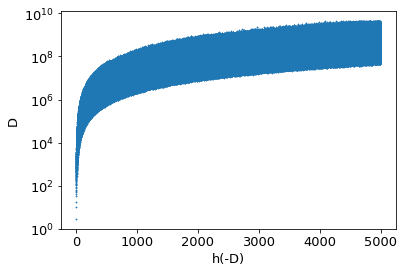

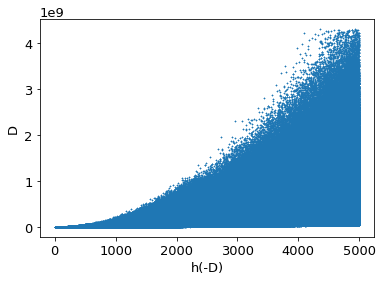

In [10]:
a4_dims = None#(6,4)#None#(3.7*11.7, 0.5*8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.rcParams.update({'font.size': 13})
num_xticks = 5.
step_xticks = int((max_d) / num_xticks)
labels_xticks = ['2^%s' % math.log(x) for x in range(1, max_d, step_xticks)]
labels_xticks = [x for x in range(1, max_d, step_xticks)]

#pyplot.xticks(np.arange(0, max_d, step_xticks))
#sns.scatterplot(ax=ax, y='k', x='d', data=data, size=1, marker=',')
#sns.scatterplot(ax=ax, y='d', x='k', data=data, marker='+')
#sns.violinplot(ax=ax, y='k', x='bin', data=data_bin)
#sns.violinplot(ax=ax, x='d', y='kbin', data=data_bin, orient='h')

logger.info('G1...')
fig2 = sns.scatterplot(ax=ax, y='d', x='k', data=data, marker='+', s=3)
ax.set_ylabel("D")
ax.set_xlabel("h(-D)")
#ax.set(xscale="log")
ax.set(yscale="log")
plt.rcParams.update({'font.size': 13})
#plt.savefig("/tmp/class_num_log.pdf",bbox_inches='tight', dpi=900)
plt.savefig("/tmp/class_num_log.png",bbox_inches='tight', dpi=900)

logger.info('G2...')
fig, ax = pyplot.subplots(figsize=a4_dims)
fig2 = sns.scatterplot(ax=ax, y='d', x='k', data=data, marker='+', s=3)
ax.set_ylabel("D")
ax.set_xlabel("h(-D)")
plt.rcParams.update({'font.size': 13})
#plt.savefig("/tmp/class_num.pdf",bbox_inches='tight', dpi=900)
plt.savefig("/tmp/class_num.png",bbox_inches='tight', dpi=900)
# TODO: violin plot, binning, 

-----------------------------------
# Factor results
 - factor_2.json - paper results, `--cheng`, `--qinv`
 - factor_3.json - re-run with uniform prime generation, without interval reset bug, `--cheng`, `--qinv`
 

In [52]:
data_factor = json.load(open('/Users/dusanklinec/workspace/codesign-analysis/factor_3.json'))
data_factor['results'] = [x for x in data_factor['results'] if 'results' in x and x['results'] is not None]
print('Records: %s' % len(data_factor['results']))

Records: 25358


In [53]:
min_dics = {x:min(samples_cn[x]) for x in samples_cn}
max_dics = {x:max(samples_cn[x]) for x in samples_cn}
print(min_dics[list(min_dics.keys())[0]])
print(samples_d2k[2**7+3])
print(min_dics[20])
print(max_dics[20])

3
5
1739
58507


In [132]:
only_mins = False
only_true_mins = False
only_cnsum = False
only_minmax = True
only_true_minmax = False
only_bitsizes = None #[256]
bound_cn = 5000
no_legend = only_bitsizes is not None and len(only_bitsizes) == 1

sel_cns = [10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,2000]
dset2 = []
pbits=set()
seen_cns = {cn:set() for cn in [256, 512, 1024, 2048]}  #   bitsize -> class numbers
seen_dics = {cn:dict() for cn in [256, 512, 1024, 2048]}  # bitsize -> class numbers -> discriminants
min_dics = {x:min(samples_cn[x]) for x in samples_cn}  #    class num -> minimal discriminant
max_dics = {x:max(samples_cn[x]) for x in samples_cn}  #    class num -> minimal discriminant
counts_res = collections.defaultdict(lambda: 0)
counts_bit_res = collections.defaultdict(lambda: 0)
hilbert_times = collections.defaultdict(lambda: [])
sel_cns_data = collections.defaultdict(lambda: [])
timing_data = collections.defaultdict(lambda: collections.defaultdict(lambda: []))
timing_data_D = collections.defaultdict(lambda: collections.defaultdict(lambda: []))
timing_data_H = collections.defaultdict(lambda: collections.defaultdict(lambda: []))
timing_data_HD = collections.defaultdict(lambda: [])

n_mins_skipped = 0
n_true_mins_skipped = 0
n_timeout = 0
n_invalid = 0
us = []
u_cns = []
data_timeouts_raw = []


def avg(it):
    return sum(it) / float(len(it)) if len(it) > 0 else -1


def cluster_name(cn):
    if cn is None or len(cn) == 0:
        return ''
    prts = cn.split('.')
    nm = re.match(r'^([\w-]+?)([\d]+)$', prts[0])
    if nm is None:
        return cn
    return '%s.%s' % (nm.group(1), '.'.join(prts[1:]))


def rec2ds(c):
    return {
        'time_total': c['time_total'], 
        'class_num': c['class_num'], 
        'disc': c['disc'], 
        'prime_bits': c['prime_bits'],
        'prime_bitss': str(c['prime_bits']),
        'u': c['results']['u'],
        'cpu_brand': c['cpu']['brand'],
        'cpu_hz': c['cpu']['hz_advertised'],
        'cluster': cluster_name(c['hostname']),
        'time_hilbert': c['results']['time_hilbert'],
        'time_div': c['results']['time_agg_div'],
        'time_gcd': c['results']['time_agg_gcd'],
        'time_qinv_xgcd': c['results']['time_qinv_xgcd'],
        'time_a': c['results']['time_a'],
        'time_q': c['results']['time_q'],
    }


for c in data_factor['results']:
    seen_cns[c['prime_bits']].add(c['class_num'])
    seen_dics[c['prime_bits']][c['class_num']] = set()
    
for c in data_factor['results']:
    seen_dics[c['prime_bits']][c['class_num']].add(c['disc'])

for c in data_factor['results']:
    pbits.add(c['prime_bits'])
    is_true_min, is_true_max = c['disc'] == min_dics[c['class_num']], c['disc'] == max_dics[c['class_num']]
    is_min = min(seen_dics[c['prime_bits']][c['class_num']]) == c['disc']
    is_max = is_true_max# max(seen_dics[c['prime_bits']][c['class_num']]) == c['disc']
    
    if 'out_of_time' in c['results'] and c['results']['out_of_time']:
        n_timeout += 1
        data_timeouts_raw.append(rec2ds(c))
        continue
    if 'r' not in c['results'] or c['results']['r'] is None:
        n_invalid += 1
        continue
    if only_bitsizes is not None and c['prime_bits'] not in only_bitsizes: 
        continue
    if 'time_hilbert' in c['results']:   
        hilbert_times[c['disc']].append(c['results']['time_hilbert'])
    if bound_cn is not None and c['class_num'] > bound_cn:
        continue
    if only_mins and min(seen_dics[c['prime_bits']][c['class_num']]) != c['disc']:
        n_mins_skipped += 1
        continue
    if only_true_mins and not is_true_min:  # minimal discriminant for this class number?
        n_true_mins_skipped += 1
        continue
    if only_cnsum and c['class_num'] not in [25, 50, 75, 100, 125, 150, 175, 200, 300, 400, 500, 600, 700]:
        continue
    if only_true_minmax and not is_true_min and not is_true_max:
        continue
    if only_minmax and not is_min and not is_max:
        continue
    if c['class_num'] in sel_cns:
        sel_cns_data[c['class_num']].append(c)
    if c['results']['u'] > 1:
        u_cns.append((c['class_num'],c['prime_bits']))
    
    us.append(c['results']['u'])
    data_idx = c['prime_bits'], c['disc']
    crec = rec2ds(c)
    crec['is_dmin'] = is_true_min
    crec['is_dmax'] = is_true_max
    crec['d_type'] = 'max' if is_true_max else ('min' if is_true_min else '')
    crec['d_type2'] = 'max' if is_max else ('min' if is_min else '')
    dset2.append(crec)
    counts_res[data_idx] += 1
    counts_bit_res[c['prime_bits']] += 1
    timing_data[c['prime_bits']][c['class_num']].append(c['time_total'])
    timing_data_D[c['prime_bits']][c['class_num']].append(c['results']['time_agg_div'])
    timing_data_H[c['prime_bits']][c['class_num']].append(c['results']['time_hilbert'])
    timing_data_HD[c['disc']].append(c['results']['time_hilbert'])

hilbert_avg = {x : avg(hilbert_times[x]) for x in hilbert_times.keys()}
    
print('Bit sizes: %s' % pbits)
print('Min skipped: %s, true min skipped: %s, n timeout: %s, n invalid: %s, len(dataset): %s' 
      % (n_mins_skipped, n_true_mins_skipped, n_timeout, n_invalid, len(dset2)))
#print(counts_res.keys())
#print(hilbert_avg)
#print(sel_cns_data)

data = pd.DataFrame(dset2)
data_timeouts = pd.DataFrame(data_timeouts_raw)
max_d = max([x['disc'] for x in dset2])
min_d = min([x['disc'] for x in dset2])
max_k = max([x['class_num'] for x in dset2])
min_k = min([x['class_num'] for x in dset2])
tot_k = len(set([x['class_num'] for x in dset2]))
tot_d = len(set([x['disc'] for x in dset2]))
print('D: [%s, %s], ln_set: %s' % (min_d, max_d, tot_d))
print('k: [%s, %s], ln_set: %s' % (min_k, max_k, tot_k))
print('Counts per bit sizes: %s' % counts_bit_res)

nbins = 15
bin_size = int(math.ceil((1 + max_d - 0) / float(nbins)))
kbin_size = int(math.ceil((1 + max_k - 0) / float(nbins)))
print('BinSize: %s, kbin size: %s' % (bin_size, kbin_size))

sset=set()
for c in dset2:
    pass
    # c['bin'] = bin_size*(c['disc'] // bin_size)
    # c['bin'] = '2e%s' % int(math.log(max(1, bin_size*(c['d'] // bin_size)), 2))
    # c['bin'] = int(math.log(max(1, bin_size*(c['d'] // bin_size)), 2))
    # c['bin'] = math.log(max(1, bin_size*(c['d'] // bin_size)), 2)
    # c['bin'] = int(math.log(max(1, c['d']), 2))
    # sset.add(c['bin'])
    # c['kbin'] = kbin_size*(c['class_num'] // kbin_size)
    
data_bin = pd.DataFrame(sorted(dset2, key=lambda x: x['prime_bits']))
print([x for x in us if x > 1])
print(sorted(u_cns))
print(len([x for x in us if x > 1]))
print(len([x for x in us if x == 1]))
print(avg(us))

Bit sizes: {256, 512, 2048, 1024}
Min skipped: 0, true min skipped: 0, n timeout: 94, n invalid: 0, len(dataset): 19375
D: [11, 4291745203], ln_set: 2443
k: [1, 5000], ln_set: 1800
Counts per bit sizes: defaultdict(<function <lambda> at 0x17ab4eea0>, {256: 7329, 512: 4047, 1024: 4047, 2048: 3952})
BinSize: 286116347, kbin size: 334
[3, 6, 3, 2, 2, 4, 2, 3, 2, 3, 2, 2, 4, 8, 3, 2, 2, 4, 2, 2, 2, 2, 2]
[(1, 256), (1, 256), (1, 512), (1, 512), (1, 512), (1, 512), (1, 1024), (1, 1024), (1, 2048), (1, 2048), (2, 256), (2, 512), (2, 1024), (2, 2048), (3, 512), (3, 1024), (3, 1024), (3, 1024), (3, 1024), (3, 2048), (4, 2048), (4, 2048), (10, 2048)]
23
19352
1.0022709677419355


------------------------------------------------------
## Factor graphs

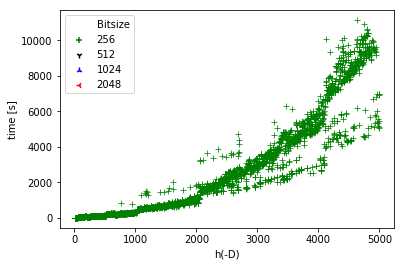

In [42]:
from matplotlib.lines import Line2D
SMALL_GRAPH = True

a4_dims = (0.7*11.7, 0.7*8.27) if not SMALL_GRAPH else None
fig, ax = pyplot.subplots(figsize=a4_dims)

markers = ['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V']
cmarkers = ['+', '1', '2', '3']
cats = ['256','512','1024','2048']

#sns.scatterplot(ax=ax, y='k', x='d', data=data, size=1, marker=',')
kwargs = {} if no_legend else {'hue':'prime_bitss', 'hue_order':cats, 'style':'prime_bitss', 'style_order':cats}
f2=sns.scatterplot(ax=ax, y='time_total', x='class_num', 
                   palette=["g", "k", "b", "r"], markers=cmarkers, color='g', marker='+',
                   data=data, #s=20,
                   **kwargs)
#sns.scatterplot(ax=ax, y='d', x='k', data=data, marker='+')
#sns.violinplot(ax=ax, y='k', x='bin', data=data_bin)
#sns.violinplot(ax=ax, x='d', y='kbin', data=data_bin, orient='h')
#sns.plot()

ax.set_xlabel("h(-D)")
ax.set_ylabel("time [s]")
if not no_legend:
    legend = ax.legend()
    legend.texts[0].set_text('Bitsize')
plt.rcParams.update({'font.size': 13})
plt.savefig("/tmp/factor_time_t_cn.pdf",bbox_inches='tight', dpi=900)
plt.savefig("/tmp/factor_time_t_cn.png",bbox_inches='tight', dpi=900)
#plt.add_legend(label_order = ['0','-1','-2', '-3'])
#f2._legend.set_title("nahaha")
# TODO: violin plot, binning, 

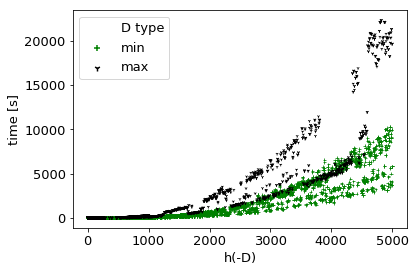

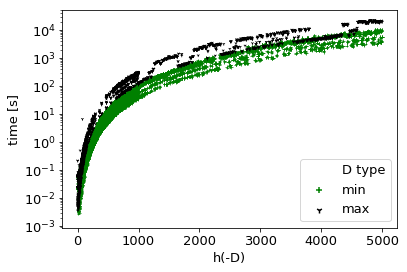

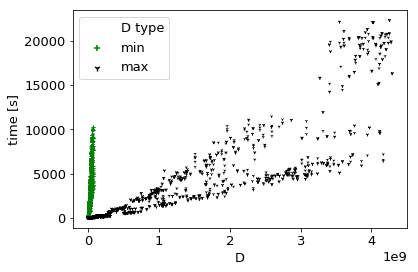

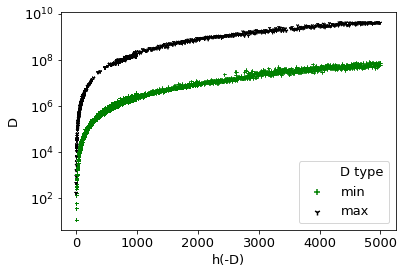

In [133]:
# These graphs require only_minmax=True || only_true_minmax=True
d_type = 'd_type2' if only_minmax else 'd_type'
a4_dims = (0.7*11.7, 0.7*8.27) if not SMALL_GRAPH else None
fig, ax = pyplot.subplots(figsize=a4_dims)
palette=["g", "k"] 
cmarkers = ['+', '1']
cats = ['min','max']

sns.scatterplot(ax=ax, y='time_hilbert', x='class_num',
                hue=d_type, hue_order=cats, style=d_type, style_order=cats,
                palette=palette, markers=cmarkers,
                data=data, s=10)

ax.set_xlabel("h(-D)")
ax.set_ylabel("time [s]")
#ax.set(yscale="log")
#ax.set(xscale="log")
legend = ax.legend()
legend.texts[0].set_text('D type')
plt.rcParams.update({'font.size': 13})
plt.savefig("/tmp/hilbert_time_5000.pdf",bbox_inches='tight', dpi=900)
plt.savefig("/tmp/hilbert_time_5000.png",bbox_inches='tight', dpi=900)


fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, y='time_hilbert', x='class_num',
                hue=d_type, hue_order=cats, style=d_type, style_order=cats,
                palette=palette, markers=cmarkers,
                data=data, s=10)

ax.set_xlabel("h(-D)")
ax.set_ylabel("time [s]")
ax.set(yscale="log")
legend = ax.legend()
legend.texts[0].set_text('D type')
plt.rcParams.update({'font.size': 13})
plt.savefig("/tmp/hilbert_time_5000_logy.pdf",bbox_inches='tight', dpi=900)
plt.savefig("/tmp/hilbert_time_5000_logy.png",bbox_inches='tight', dpi=900)


fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, y='time_hilbert', x='disc', 
                hue=d_type, hue_order=cats, style=d_type, style_order=cats,
                palette=palette, markers=cmarkers,
                data=data, s=10)

ax.set_xlabel("D")
ax.set_ylabel("time [s]")
legend = ax.legend()
legend.texts[0].set_text('D type')
plt.rcParams.update({'font.size': 13})
plt.savefig("/tmp/hilbert_time_5000_D.pdf",bbox_inches='tight', dpi=900)
plt.savefig("/tmp/hilbert_time_5000_D.png",bbox_inches='tight', dpi=900)

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, y='disc', x='class_num', 
                hue=d_type, hue_order=cats, style=d_type, style_order=cats,
                palette=palette, markers=cmarkers,
                data=data, s=10)

ax.set_xlabel("h(-D)")
ax.set_ylabel("D")
ax.set(yscale="log")
legend = ax.legend()
legend.texts[0].set_text('D type')
plt.rcParams.update({'font.size': 13})
plt.savefig("/tmp/hilbert_5000.pdf",bbox_inches='tight', dpi=900)
plt.savefig("/tmp/hilbert_5000.png",bbox_inches='tight', dpi=900)

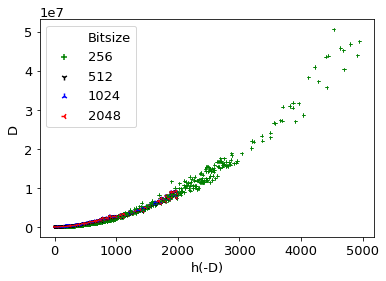

In [98]:
from matplotlib.lines import Line2D

a4_dims = (0.7*11.7, 0.7*8.27) if not SMALL_GRAPH else None
fig, ax = pyplot.subplots(figsize=a4_dims)

cmarkers = ['+', '1', '2', '3']
cats = ['256','512','1024','2048']

f2=sns.scatterplot(ax=ax, y='disc', x='class_num', 
                   hue='prime_bitss', hue_order=cats, 
                   style='prime_bitss', style_order=cats,
                   palette=["g", "k", "b", "r"], 
                   data=data, s=10,
                   markers=cmarkers)

ax.set_xlabel("h(-D)")
ax.set_ylabel("D")
legend = ax.legend()
legend.texts[0].set_text('Bitsize')
plt.savefig("/tmp/factor_time.pdf",bbox_inches='tight')

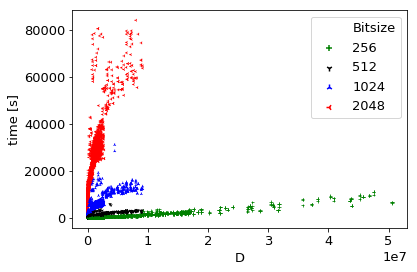

In [99]:
from matplotlib.lines import Line2D

a4_dims = (0.7*11.7, 0.7*8.27) if not SMALL_GRAPH else None
fig, ax = pyplot.subplots(figsize=a4_dims)

cmarkers = ['+', '1', '2', '3']
cats = ['256','512','1024','2048']

f2=sns.scatterplot(ax=ax, y='time_total', x='disc', 
                   hue='prime_bitss', hue_order=cats, 
                   style='prime_bitss', style_order=cats,
                   palette=["g", "k", "b", "r"], 
                   data=data, s=10,
                   markers=cmarkers)

ax.set_xlabel("D")
ax.set_ylabel("time [s]")
plt.rcParams.update({'font.size': 13})
legend = ax.legend()
legend.texts[0].set_text('Bitsize')
plt.savefig("/tmp/factor_time_D.pdf",bbox_inches='tight')

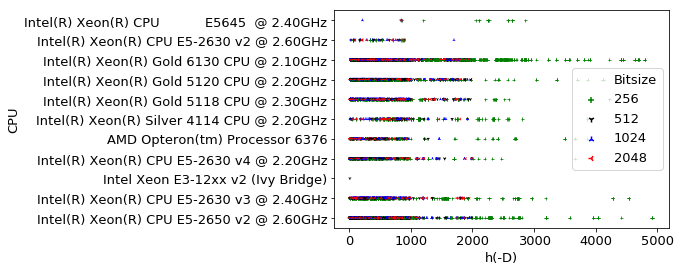

In [100]:
from matplotlib.lines import Line2D

a4_dims = (0.7*11.7, 0.7*8.27) if not SMALL_GRAPH else None
fig, ax = pyplot.subplots(figsize=a4_dims)

cmarkers = ['+', '1', '2', '3']
cats = ['256','512','1024','2048']

# cluster, cpu_brand, cpu_hz
f2=sns.scatterplot(ax=ax, y='cpu_brand', x='class_num', 
                   hue='prime_bitss', hue_order=cats, 
                   style='prime_bitss', style_order=cats,
                   palette=["g", "k", "b", "r"], 
                   data=data, s=10,
                   markers=cmarkers)

ax.set_xlabel("h(-D)")
ax.set_ylabel("CPU")
legend = ax.legend()
legend.texts[0].set_text('Bitsize')
#plt.savefig("/tmp/factor_time_D.pdf")

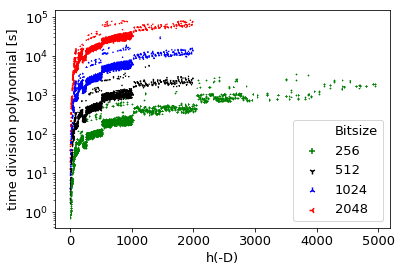

In [101]:
from matplotlib.lines import Line2D

a4_dims = (0.7*11.7, 0.7*8.27) if not SMALL_GRAPH else None
fig, ax = pyplot.subplots(figsize=a4_dims)

cmarkers = ['+', '1', '2', '3']
cats = ['256','512','1024','2048']

#'time_hilbert': c['results']['time_hilbert'],
#'time_div': c['results']['time_agg_div'],
#'time_gcd': c['results']['time_agg_gcd'],
#'time_qinv_xgcd': c['results']['time_qinv_xgcd'],

kwargs = {} if no_legend else {'hue':'prime_bitss', 'hue_order':cats, 'style':'prime_bitss', 'style_order':cats}
f2=sns.scatterplot(ax=ax, y='time_div', x='class_num', 
                   palette=["g", "k", "b", "r"], markers=cmarkers, color='g', marker='+',
                   data=data, s=3, **kwargs)

ax.set_xlabel("h(-D)")
ax.set_ylabel("time division polynomial [s]")
#ax.set_ylabel("time [s]")
ax.set(yscale="log")
if not no_legend:
    legend = ax.legend()
    legend.texts[0].set_text('Bitsize')

#plt.savefig("/tmp/factor_time_logt_5000cn_256b.pdf",bbox_inches='tight')
#plt.savefig("/tmp/factor_time_logt_5000cn_256b.png",bbox_inches='tight', dpi=600)
plt.rcParams.update({'font.size': 12})
plt.savefig("/tmp/factor_time_logt_cn.pdf",bbox_inches='tight')
plt.savefig("/tmp/factor_time_logt_cn.png",bbox_inches='tight', dpi=600)

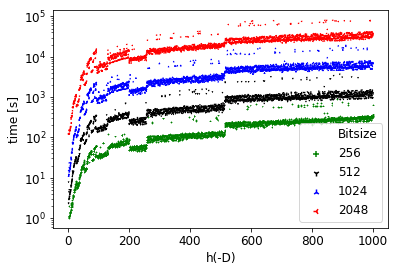

In [118]:
from matplotlib.lines import Line2D

a4_dims = (0.7*11.7, 0.7*8.27) if not SMALL_GRAPH else None
fig, ax = pyplot.subplots(figsize=a4_dims)

cmarkers = ['+', '1', '2', '3']
cats = ['256','512','1024','2048']

kwargs = {} if no_legend else {'hue':'prime_bitss', 'hue_order':cats, 'style':'prime_bitss', 'style_order':cats}
f2=sns.scatterplot(ax=ax, y='time_total', x='class_num', 
                   palette=["g", "k", "b", "r"], markers=cmarkers, color='g', marker='+',
                   data=data[data.class_num<=1000], s=3, **kwargs)

ax.set_xlabel("h(-D)")
ax.set_ylabel("time [s]")
ax.set(yscale="log")
if not no_legend:
    legend = ax.legend()
    legend.texts[0].set_text('Bitsize')

#plt.savefig("/tmp/factor_time_logt_5000cn_256b_t.pdf",bbox_inches='tight')
#plt.savefig("/tmp/factor_time_logt_5000cn_256b_t.png",bbox_inches='tight', dpi=600)
plt.rcParams.update({'font.size': 11})
plt.savefig("/tmp/factor_time_logt_cn.pdf",bbox_inches='tight', dpi=600)
plt.savefig("/tmp/factor_time_logt_cn.png",bbox_inches='tight', dpi=600)

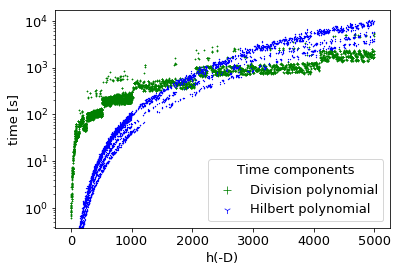

In [114]:
a4_dims = (0.7*11.7, 0.7*8.27) if not SMALL_GRAPH else None
#a4_dims = (10.7*11.7, 0.7*8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

cno_legend = True
cdata = data[data.prime_bitss == '256']

# Hilbert + division polynomial + Total
kwargs = {} if (no_legend or cno_legend) else {'hue':'prime_bitss', 'hue_order':cats, 'style':'prime_bitss', 'style_order':cats}
# f2=sns.scatterplot(ax=ax, y='time_total', x='class_num', 
#                    palette=["g", "k", "b", "r"], markers=cmarkers, color='k', marker='+',
#                    data=data, s=3, **kwargs)

sns.scatterplot(ax=ax, y='time_div', x='class_num', 
                   palette=["g", "k", "b", "r"], markers=cmarkers, color='g', marker='+', label='Division polynomial',
                   data=cdata, s=2, **kwargs)

sns.scatterplot(ax=ax, y='time_hilbert', x='class_num', 
                   palette=["g", "k", "b", "r"], markers=cmarkers, color='b', marker='1', label='Hilbert polynomial',
                   data=cdata, s=2, **kwargs)

legend = ax.legend(loc=4, markerscale=5)
legend.set_title('Time components')
ax.set_xlabel("h(-D)")
ax.set_ylabel("time [s]")

ax.set(yscale="log")
plt.rcParams.update({'font.size': 13})
plt.savefig("/tmp/factor_time_components_5000cn_256b.pdf",bbox_inches='tight', dpi=600)
plt.savefig("/tmp/factor_time_components_5000cn_256b.png",bbox_inches='tight', dpi=600)
#sns.distplot(a=[x['prime_bits'] for x in data_timeouts], ax=ax, hist=True, norm_hist=False, bins='auto')

In [50]:
def lpad(x, ln=8):
    x = str(x)
    return (' ' * (ln-len(x))) + x if len(x) < ln else x 
    
    
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]
    
    
def fmtths(full):
    return (' '.join([x.strip() for x in chunks(full[::-1], 3)])[::-1]).strip()
    
    
def xths(x):
    x = str(x)
    if '.' in x:
        full, dec = x.split('.')
        return fmtths(full) + '.' + dec
    else:
        return fmtths(x)
    
    
def xfmt(x):
    return lpad(xths(x))
    
    
def copm_table(sel_cns, sel_cns_data):
    dres = []
    all_bits = [256, 512, 1024, 2048]
    for cn in sel_cns:
        res = sel_cns_data[cn]
        if len(res) == 0: continue
        sres = []
        for b in all_bits:
            time_avg = avg([x['results']['time_total'] for x in res if x['prime_bits'] == b])
            time_a = avg([x['results']['time_a'] for x in res if x['prime_bits'] == b])
            time_q = avg([x['results']['time_q'] for x in res if x['prime_bits'] == b])
            time_div = avg([x['results']['time_agg_div'] for x in res if x['prime_bits'] == b])
            time_gcd = avg([x['results']['time_agg_gcd'] for x in res if x['prime_bits'] == b])
            time_nrm = avg([x['results']['time_agg_nrm'] if 'time_agg_nrm' in x['results'] else 0 for x in res if x['prime_bits'] == b])
            time_qinv_xgcd = avg([x['results']['time_qinv_xgcd'] if 'time_qinv_xgcd' in x['results'] else 0 for x in res if x['prime_bits'] == b])
            time_hilbert = avg([x['results']['time_hilbert'] for x in res if x['prime_bits'] == b])
            agg_u = avg([x['results']['u'] for x in res if x['prime_bits'] == b])
            agg_c = avg([x['results']['c'] for x in res if x['prime_bits'] == b])
            time_s = time_a+time_q+time_div+time_gcd
            sres.append((time_avg, 100*time_a/time_avg, 100*time_q/time_avg, 
                         100*time_div/time_avg, 100*time_gcd/time_avg, 
                         agg_u, agg_c,
                         100*time_hilbert/time_avg, 100*time_qinv_xgcd/time_avg, 100*time_nrm/time_avg))
        dres.append((cn, res[0]['disc'], sres))
    #print(dres)
        
    # Generate latex table
    ncols = len(sel_cns)
    print('----- TABLE -----')
    print('{l|%s}' % ('|'.join(['r' for _ in range(ncols)])))
    print('h(-D)      & ' + ' & '.join([xfmt(x[0]) for x in dres]) + '\\\\')
    print('D          & ' + ' & '.join([xfmt(x[1]) for x in dres]) + '\\\\')
    for idx, b in enumerate(all_bits):
        print('\\hline\n\\multicolumn{%d}{|c|}{%s bits} \\\\ \\hline' % (ncols+1, b))
        print('time [s]    & ' + ' & '.join([xfmt('%7.2f' % x[2][idx][0]) for x in dres]) + ' \\\\')
        #print('time a [\%] & ' + ' & '.join([xfmt('%2.2f' % x[2][idx][1]) for x in dres]) + ' \\\\')
        #print('time b [\%] & ' + ' & '.join([xfmt('%2.2f' % x[2][idx][2]) for x in dres]) + ' \\\\')
        print('time D [\%] & ' + ' & '.join([xfmt('%2.2f' % x[2][idx][3]) for x in dres]) + ' \\\\')
        #print('time B [\%] & ' + ' & '.join([xfmt('%2.2f' % x[2][idx][4]) for x in dres]) + ' \\\\')
        #print('time u [\%] & ' + ' & '.join([xfmt('%2.2f' % x[2][idx][5]) for x in dres]) + ' \\\\')
        #print('time c [\%] & ' + ' & '.join([xfmt('%2.2f' % x[2][idx][6]) for x in dres]) + ' \\\\')
        print('time H [\%] & ' + ' & '.join([xfmt('%2.2f' % x[2][idx][7]) for x in dres]) + ' \\\\')
        #print('time X [\%] & ' + ' & '.join([xfmt('%2.2f' % x[2][idx][8]) for x in dres]) + ' \\\\')
        #print('time N [\%] & ' + ' & '.join([xfmt('%2.2f' % x[2][idx][9]) for x in dres]) + ' \\\\')

def project_cns(sel, data, ssel):
    rsel = []
    rdata = {}
    for x in ssel:
        rsel.append(x)
        rdata[x] = data[x]
    return rsel, rdata
    
copm_table(*project_cns(sel_cns, sel_cns_data, [10,100,200,300,400,500,600,700]))

----- TABLE -----
{l|r|r|r|r|r|r|r|r}
h(-D)      &       10 &      100 &      200 &      300 &      400 &      500 &      600 &      700\\
D          &      611 &   34 859 &  125 579 &  223 739 &  428 819 &  742 979 &  834 539 & 1 166 051\\
\hline
\multicolumn{9}{|c|}{256 bits} \\ \hline
time [s]    &     1.85 &    39.33 &    54.72 &   100.94 &   112.95 &   134.63 &   249.95 &   189.63 \\
time D [\%] &    93.32 &    99.17 &    97.62 &    96.40 &    94.14 &    92.74 &    95.74 &    84.79 \\
time H [\%] &     0.30 &     0.33 &     1.51 &     2.50 &     4.34 &     5.79 &     3.27 &    13.37 \\
\hline
\multicolumn{9}{|c|}{512 bits} \\ \hline
time [s]    &    -1.00 &    -1.00 &    -1.00 &    -1.00 &    -1.00 &    -1.00 &    -1.00 &    -1.00 \\
time D [\%] &   100.00 &   100.00 &   100.00 &   100.00 &   100.00 &   100.00 &   100.00 &   100.00 \\
time H [\%] &   100.00 &   100.00 &   100.00 &   100.00 &   100.00 &   100.00 &   100.00 &   100.00 \\
\hline
\multicolumn{9}{|c|}{1024 bits} \\ \hl

In [51]:
hilbert_samples = [3,11,19,35,43,51,59,67,83,91,107,115,123,131] + [2**x+3 for x in range(8, 23)]
for smpl in hilbert_samples:
    if smpl in hilbert_avg:
        print('Sample: %08d: %s' % (smpl, hilbert_avg[smpl]))
    else:
        print('Sample: %08d' % (smpl, ))

Sample: 00000003
Sample: 00000011: 0.01112508773803711
Sample: 00000019
Sample: 00000035
Sample: 00000043
Sample: 00000051
Sample: 00000059
Sample: 00000067
Sample: 00000083
Sample: 00000091
Sample: 00000107
Sample: 00000115
Sample: 00000123
Sample: 00000131: 0.0163117249806722
Sample: 00000259
Sample: 00000515
Sample: 00001027
Sample: 00002051
Sample: 00004099
Sample: 00008195
Sample: 00016387
Sample: 00032771
Sample: 00065539
Sample: 00131075
Sample: 00262147
Sample: 00524291
Sample: 01048579
Sample: 02097155
Sample: 04194307


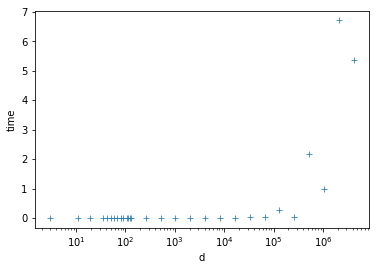

In [134]:
def merge_hilberts(arrs):
    hilbert_avg_gross = collections.defaultdict(lambda: [])
    for arr in arrs:
        for d in arr.keys():
            hilbert_avg_gross[d] += arr[d]
    #for d in sorted(hilbert_avg_gross.keys()):
    #    print('Hilbert: %8d: %s us' % (d, avg(hilbert_avg_gross[d])*1e6))
    return hilbert_avg_gross
        
merged = merge_hilberts([
{1027: [0.0002541542053222656], 32771: [0.03275299072265625], 3: [0.00018286705017089844], 1048579: [0.9498701095581055], 11: [0.0001239776611328125], 131: [0.0001590251922607422], 2051: [0.0007569789886474609], 65539: [0.03657197952270508], 35: [0.00011205673217773438], 2097155: [6.7972869873046875], 43: [8.296966552734375e-05], 51: [7.104873657226562e-05], 59: [0.0002090930938720703], 19: [9.202957153320312e-05], 67: [8.392333984375e-05], 83: [0.0001289844512939453], 91: [0.00011491775512695312], 4099: [0.0007138252258300781], 131075: [0.2566211223602295], 4194307: [5.114866018295288], 259: [0.0003399848937988281], 8195: [0.0034570693969726562], 107: [0.00011301040649414062], 262147: [0.03109908103942871], 515: [0.0002770423889160156], 16387: [0.0020170211791992188], 115: [0.00011301040649414062], 524291: [2.085622787475586], 123: [0.0001361370086669922]},
{1027: [0.0001239776611328125], 32771: [0.040158987045288086], 3: [0.00018596649169921875], 1048579: [0.9262030124664307], 11: [0.00016188621520996094], 131: [0.00010609626770019531], 2051: [0.0009610652923583984], 65539: [0.03403496742248535], 35: [0.00012183189392089844], 2097155: [6.713495969772339], 43: [6.389617919921875e-05], 51: [7.796287536621094e-05], 59: [0.00018215179443359375], 19: [0.0001361370086669922], 67: [7.796287536621094e-05], 83: [9.298324584960938e-05], 91: [0.00020599365234375], 4099: [0.0005640983581542969], 131075: [0.24758100509643555], 4194307: [5.295342206954956], 259: [0.00012302398681640625], 8195: [0.0037670135498046875], 107: [0.0001621246337890625], 262147: [0.027240991592407227], 515: [0.00018787384033203125], 16387: [0.001528024673461914], 115: [7.915496826171875e-05], 524291: [2.0856690406799316], 123: [9.512901306152344e-05]},
{1027: [0.00018286705017089844], 32771: [0.03510618209838867], 3: [0.00019288063049316406], 1048579: [0.9702529907226562], 11: [0.00014400482177734375], 131: [9.202957153320312e-05], 2051: [0.0008409023284912109], 65539: [0.050916194915771484], 35: [8.392333984375e-05], 2097155: [6.394626140594482], 43: [0.00011801719665527344], 51: [0.00012493133544921875], 59: [0.00010704994201660156], 19: [0.00011706352233886719], 67: [4.9114227294921875e-05], 83: [0.00011610984802246094], 91: [0.00014591217041015625], 4099: [0.0006840229034423828], 131075: [0.3045809268951416], 4194307: [5.727079153060913], 259: [0.00017905235290527344], 8195: [0.00438690185546875], 107: [0.00010013580322265625], 262147: [0.04074883460998535], 515: [0.0002338886260986328], 16387: [0.0013630390167236328], 115: [0.0001010894775390625], 524291: [2.3059492111206055], 123: [8.797645568847656e-05]},
{1027: [0.0002701282501220703], 32771: [0.06304192543029785], 3: [0.0001628398895263672], 1048579: [1.1776001453399658], 11: [0.0001468658447265625], 131: [0.00015592575073242188], 2051: [0.0019440650939941406], 65539: [0.050833940505981445], 35: [0.00021600723266601562], 2097155: [7.091583967208862], 43: [0.00016188621520996094], 51: [0.0001239776611328125], 59: [0.00023102760314941406], 19: [0.00014400482177734375], 67: [0.001569986343383789], 83: [0.00015497207641601562], 91: [0.00017714500427246094], 4099: [0.0013370513916015625], 131075: [0.30550098419189453], 4194307: [5.291439056396484], 259: [0.0001838207244873047], 8195: [0.01429605484008789], 107: [0.00018715858459472656], 262147: [0.027040958404541016], 515: [0.0003750324249267578], 16387: [0.0019450187683105469], 115: [0.0003199577331542969], 524291: [2.188676118850708], 123: [0.00011801719665527344]},
{1027: [0.00024509429931640625], 32771: [0.033564090728759766], 3: [0.00021910667419433594], 1048579: [0.9555680751800537], 11: [0.00010013580322265625], 131: [0.00027489662170410156], 2051: [0.001132965087890625], 65539: [0.02266693115234375], 35: [9.298324584960938e-05], 2097155: [6.55650520324707], 43: [0.00018310546875], 51: [0.0001361370086669922], 59: [0.0004620552062988281], 19: [0.00017118453979492188], 67: [0.00015401840209960938], 83: [0.00023508071899414062], 91: [0.0005869865417480469], 4099: [0.0005590915679931641], 131075: [0.2563290596008301], 4194307: [5.442828893661499], 259: [0.0006430149078369141], 8195: [0.003910064697265625], 107: [0.0004200935363769531], 262147: [0.03488802909851074], 515: [0.00039196014404296875], 16387: [0.001806020736694336], 115: [0.00017189979553222656], 524291: [2.2377350330352783], 123: [0.0003819465637207031]}
])

hild_dset = [{'d':x, 'time':avg(merged[x])} for x in merged]
hilb_data = pd.DataFrame(hild_dset)

a4_dims = None  #(1*11.7, 1*8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.set(xscale="log")
#sns.scatterplot(ax=ax, y='k', x='d', data=data, size=1, marker=',')
sns.scatterplot(ax=ax, y='time', x='d', data=hilb_data, marker='+')


In [206]:
with open('/tmp/process') as fh:
    procs = sorted([x.strip() for x in fh.readlines()])
    for k, g in itertools.groupby(procs):
        print('Class: %s, len: %s' % (k, len(list(g))))
    

Class: "brand": "AMD Opteron(tm) Processor 6376",, len: 60
Class: "brand": "Intel(R) Xeon(R) CPU           E5645  @ 2.40GHz",, len: 148
Class: "brand": "Intel(R) Xeon(R) CPU E5-2630 v2 @ 2.60GHz",, len: 49
Class: "brand": "Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz",, len: 319
Class: "brand": "Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz",, len: 184
Class: "brand": "Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz",, len: 314
Class: "brand": "Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz",, len: 16
Class: "brand": "Intel(R) Xeon(R) CPU E5-2650 v4 @ 2.20GHz",, len: 3
Class: "brand": "Intel(R) Xeon(R) CPU E5-2670 0 @ 2.60GHz",, len: 71
Class: "brand": "Intel(R) Xeon(R) CPU E7-4830 v4 @ 2.00GHz",, len: 18
Class: "brand": "Intel(R) Xeon(R) Gold 5118 CPU @ 2.30GHz",, len: 206
Class: "brand": "Intel(R) Xeon(R) Gold 5120 CPU @ 2.20GHz",, len: 1124
Class: "brand": "Intel(R) Xeon(R) Gold 6130 CPU @ 2.10GHz",, len: 454
Class: "brand": "Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz",, len: 266


In [ ]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# give a list to the marker argument
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False, markers=["o", "x", "1"])
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [515]:
from matplotlib.lines import Line2D
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]
print(unfilled_markers)

['.', ',', '1', '2', '3', '4', '+', 'x', '|', '_', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [314]:
def xgcd(b, a):
    x0, x1, y0, y1 = 1, 0, 0, 1
    while a != 0:
        q, b, a = b // a, a, b % a
        x0, x1 = x1, x0 - q * x1
        y0, y1 = y1, y0 - q * y1
    return  b, x0, y0


## Approximations

In [ ]:
from scipy import optimize
from lmfit import Model
from lmfit.models import GaussianModel, ExpressionModel, ExponentialModel

def fnc_lin(x, a, b):
    return a*x + b

def fnc_quad(x, a, b, c):
    return a*x*x + b*x + c

def fnc_cub(x, a, b, c, d):
    return a*x*x*x + b*x*x + c*x + d

def fnc_log_b(x, a, b, c, d=10):
    return a*np.log(b*x)/np.log(d) + c

def fnc_log10(x, a, b, c):
    return fnc_log_b(x, a, b, c, 10)

def fnc_log2(x, a, b, c):
    return fnc_log_b(x, a, b, c, 2)

def fnc_loge(x, a, b, c):
    return fnc_log_b(x, a, b, c, 2.71828)

def fnc_lognp(x, a, b, c):
    return a * np.log(b * x) + c

def fnc_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

def fnc_sqrt(x, a, b, c):
    return a * np.square(b * x) + c

def fnc_pow(x, a, b, c, d):
    return a * np.power(b * x, c) + d

def fnc_pow2(x, a, b, c):
    return a * np.power(b * x, 0.79015402) + c

def fnc_gauss(x, a, b, c):
    return (a / (np.sqrt(2*np.pi) * c)) * np.exp(-(x-b)**2 / (2*c**2))

def goodness_of_fit(fnc, params, x_data, y_data, y_avg):
    y_fit = np.array([fnc(x, *params) for x in x_data])
    ss_res = np.sum((y_data - y_fit)**2)
    ss_tot = np.sum((y_data - y_avg)**2)
    rsqr = 1 - ss_res/ss_tot
    return rsqr

def fnc_name(fnm):
    m = re.match(r'^<function ([\w]+?) .*>$', fnm)
    return m.group(1) if m else fnm

def curve_fit(prime, rng, fnc=fnc_lin, p0=[0,0], tdata=timing_data, fname=None):
    dt = tdata[prime]
    
    x_data = []
    y_data = []
    for x in range(100, rng):
        ys = dt[x]
        if len(ys) == 0:
            continue
        y = avg(dt[x])
        if y > 60000: continue
        x_data.append(x)
        y_data.append(y)
    
    if len(y_data) < 2:
        return
    
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    y_avg = np.mean(y_data)
    
    # Scipy curve fitting
#     params, params_covariance = optimize.curve_fit(fnc, x_data, y_data, p0=p0)#, method='lm')
#     print(params)
#     print(params_covariance)
#     print(np.sqrt(np.diag(params_covariance)))
#     rsqr = goodness_of_fit(fnc, params, x_data, y_data, y_avg)
#     print('R2: %s' % rsqr)
        
    # lmfit curve fitting + fit test
    # https://lmfit.github.io/lmfit-py/model.html
    lm_par = ['a', 'b', 'c', 'd', 'e', 'f']
    gmodel = Model(fnc, nan_policy='propagate')
    kwargs = {lm_par[i]:p0[i] for i in range(len(p0))}
    result = gmodel.fit(y_data, x=x_data, **kwargs)
    print(result.fit_report())
    #print(result.conf_interval())
    #print(result.ci_report())
    #print(result.eval_uncertainty())
    #plt.figure(figsize=(6, 4))
    #result.plot_residuals()
    params = [result.best_values[lm_par[i]] for i in range(len(p0))]
    rsqr = goodness_of_fit(fnc, params, x_data, y_data, y_avg)
    print('R2: %s' % rsqr)
    
    #font = {'family' : 'normal', 'weight': 'normal', 'size'   : 14}
    #matplotlib.rc('font', **font)
    
    fig, ax = pyplot.subplots(figsize=(6, 4))
    label = 'Fitted function' #'Fitted function %s' % fnc_name(str(fnc))
    # plt.figure(figsize=(6, 4))
    
    plt.scatter(x_data, y_data, label='%s bits' % prime, s=2)
    plt.plot(x_data, fnc(x_data, *params), label=label, color='red')
    plt.legend(loc='best')  # plt.tick_params(labelsize=14)
    ax.set_xlabel("h(-D)")
    ax.set_ylabel("time [s]")
    
    #plt.show()
    plt.rcParams.update({'font.size': 13})
    plt.savefig("%s.pdf" % fname,bbox_inches='tight', dpi=600)
    plt.savefig("%s.png" % fname,bbox_inches='tight', dpi=600)
    

In [ ]:
#tdata=timing_data_D
#tdata=timing_data_H
tdata=timing_data
#jjss = json.load(open('/Users/dusanklinec/Downloads/d-out.json'))
#tdata = {int(k):{x[0]:[x[1]] for x in v} for k,v in jjss.items()}

lim = 1000
all_models = [(fnc_lin, [1,1]), (fnc_pow2, [2,2,2]), (fnc_quad, [1,1,1]), (fnc_cub, [1,1,1,1]),
              (fnc_sqrt, [1,1,1]), (fnc_pow, [1,1,1,0]), (fnc_exp, [1,1,1]), (fnc_exp, [2,2,2]), 
              (fnc_lognp, [1,1,1]), (fnc_gauss, [1,1,1]), (fnc_log2, [2,2,2]), (fnc_log_b, [2,2,2,2])]
all_models = [(fnc_lin, [1,1])]

#fnc, p0 = fnc_lin, [1,1]
#fnc, p0 = fnc_pow2, [2,2,2]
#fnc, p0 = fnc_quad, [1,1,1]
#fnc, p0 = fnc_cub, [1,1,1,1]
#fnc, p0 = fnc_sqrt, [1,1,1]
#fnc, p0 = fnc_pow, [1,1,1,0]
#fnc, p0 = fnc_exp, [1,1,1]
#fnc, p0 = fnc_lognp, [1,1,1]
#fnc, p0 = fnc_gauss, [1,1,1]
#fnc, p0 = fnc_log2, [2,2,2]
#fnc, p0 = fnc_log_b, [2,2,2,2]
for cmod in all_models:
    fnc, p0 = cmod    
    print('='*80)
    print('Fitting model %s %s' % (fnc, p0))
    #curve_fit(256, lim, fnc, p0, tdata, '/tmp/factor_time_fit_%s' % 256)    
    #curve_fit(512, lim, fnc, p0, tdata, '/tmp/factor_time_fit_%s' % 512)    
    #curve_fit(1024, lim, fnc, p0, tdata, '/tmp/factor_time_fit_%s' % 1024)
    curve_fit(2048, lim, fnc, p0, tdata, '/tmp/factor_time_fit_%s' % 2048)

In [376]:
def export_data(prime, rng):
    dt = timing_data[prime]
    x_data = range(10, rng)
    return [(x, avg(dt[x])) for x in x_data]

jjss={
    256: export_data(256, 1000),
    512: export_data(512, 1000),
    1024: export_data(1024, 1000),
    2048: export_data(2048, 1000),
}
json.dump(jjss, open('/tmp/ad_data_<3.json', 'w'))

In [21]:
# time analysis
cnsdb = json.load(open('/Users/dusanklinec/workspace/codesign-analysis/cn_upto_tgt.json'))

## Blackbox attacker

In [84]:
def timing_approx(prime, x):
    if prime == 256:
        return 0.33887*x - 1.17973
    elif prime == 512:
        return 1.23834*x + 81.44157
    elif prime == 1024:
        return 6.57677*x + 519.07422
    elif prime == 2048:
        return 32.7223*x + 4614.71032
    else:
        raise ValueError('ERR')

def blackbox_analysis(prime, cndb):
    dt = timing_data[prime]
    total_time = 0
    
    for d, cn in cndb:
        total_time += avg(dt[cn])
    return total_time, avg(dt[cndb[-1][1]])  

print(sorted(get_d_for_cn(5000))[:10])

[50868011, 53546939, 59720099, 60826211, 60896891, 61073099, 69497819, 71746451, 72702419, 81997691]


In [87]:
def blackbox_attacker(prime, samples_db):
    bb_timing = []
    accum_time = 0
    for smp in samples_db:  # assumption: sorted by d 
        if smp['d'] > 50868011:  # H(-D) = 5000, minimal D.
            continue
        ct = timing_approx(prime, smp['k'])
        accum_time += ct
        bb_timing.append({
            'd':smp['d'],
            'k':smp['k'],
            'a':accum_time,
            't':ct,
        })
    return bb_timing

In [88]:
bb_timing = blackbox_attacker(1024, samples_db)

In [106]:
cdata_bb = pd.DataFrame(bb_timing)

2019-02-02 11:16:31 phx.local __main__[74388] INFO G1...
2019-02-02 11:16:32 phx.local __main__[74388] INFO G2...
2019-02-02 11:16:34 phx.local __main__[74388] INFO Render


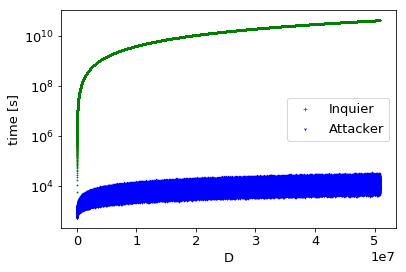

In [134]:
cno_legend = True
a4_dims = (0.7*11.7, 0.7*8.27) if not SMALL_GRAPH else None
fig, ax = pyplot.subplots(figsize=a4_dims)

logger.info('G1...')
kwargs = {} if (no_legend or cno_legend) else {'hue':'prime_bitss', 'hue_order':cats, 'style':'prime_bitss', 'style_order':cats}
sns.scatterplot(ax=ax, y='a', x='d', 
                   palette=["g", "k", "b", "r"], markers=cmarkers, color='g', marker='+', label='Inquier',
                   data=cdata_bb.iloc[::10, :], s=3, **kwargs)  # each n-th

logger.info('G2...')
sns.scatterplot(ax=ax, y='t', x='d', 
                   palette=["g", "k", "b", "r"], markers=cmarkers, color='b', marker='1', label='Attacker',
                   data=cdata_bb.iloc[::10, :], s=3, **kwargs)

logger.info('Render')
legend = ax.legend(markerscale=2)
#legend.set_title('Attacker vs. inquier')
#ax.set_xlabel("h(-D)")
ax.set_xlabel("D")
ax.set_ylabel("time [s]")

ax.set(yscale="log")
plt.rcParams.update({'font.size': 13})
#plt.savefig("/tmp/backdoor_time.pdf",bbox_inches='tight')
plt.savefig("/tmp/backdoor_time.png",bbox_inches='tight', dpi=600)

In [56]:
print('256b up to %s: %s' % (cnsdb[-1], blackbox_analysis(256, cnsdb)))
print('512 up to %s: %s' % (cnsdb[-1], blackbox_analysis(512, cnsdb)))
print('1024b up to %s: %s' % (cnsdb[-1], blackbox_analysis(1024, cnsdb)))
print('2048b up to %s: %s' % (cnsdb[-1], blackbox_analysis(2048, cnsdb)))

NameError: name 'cnsdb' is not defined

In [24]:
jjss = json.load(open('/Users/dusanklinec/Downloads/d-out.json'))

In [119]:
js_hb = json.load(open('/Users/dusanklinec/workspace/codesign-analysis/hilbert_coefs.json'))

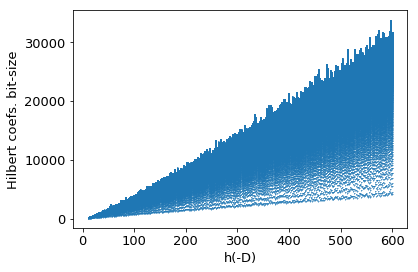

In [121]:
# Scatter plot for hilbert polys
hild_coef_dset = []
for cd in js_hb:
    if cd[0] > 600:
        continue
    hild_coef_dset += [{'cn':cd[0], 'bits':x} for x in cd[2]]
hilb_coef_data = pd.DataFrame(hild_coef_dset)

a4_dims = None  #(1*11.7, 1*8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, y='bits', x='cn', data=hilb_coef_data, marker='+', s=1)
ax.set_xlabel("h(-D)")
ax.set_ylabel("Hilbert coefs. bit-size")
#ax.set(yscale="log")
plt.rcParams.update({'font.size': 14})
plt.savefig("/tmp/hilbert_coef_sizes.pdf",bbox_inches='tight', dpi=600)
plt.savefig("/tmp/hilbert_coef_sizes.png",bbox_inches='tight', dpi=600)

In [36]:
data[data.prime_bitss == '256']

,class_num,cluster,cpu_brand,cpu_hz,d_type,disc,is_dmax,is_dmin,prime_bits,prime_bitss,time_a,time_div,time_gcd,time_hilbert,time_q,time_qinv_xgcd,time_total,u
0,1,bofur.ics.muni.cz,Intel(R) Xeon(R) CPU E5-2630 v2 @ 2.60GHz,2.6000 GHz,min,11,False,True,256,256,0.023177,1.706120,0.001285,0.009436,0.056041,0.000575,1.952946,3
1,1,alfrid.meta.zcu.cz,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,2.6000 GHz,min,11,False,True,256,256,0.031419,0.611510,0.000088,0.053576,0.038088,0.000731,1.003061,1
2,1,alfrid.meta.zcu.cz,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,2.6000 GHz,min,11,False,True,256,256,0.030264,0.655860,0.000086,0.063329,0.037640,0.000720,1.039886,1
12,2,alfrid.meta.zcu.cz,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,2.6000 GHz,min,35,False,True,256,256,0.021834,0.738499,0.000274,0.058737,0.037169,0.000685,1.046312,1
13,2,alfrid.meta.zcu.cz,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,2.6000 GHz,min,35,False,True,256,256,0.022407,2.842285,0.002010,0.058653,0.035697,0.000778,3.152209,4
14,2,alfrid.meta.zcu.cz,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,2.6000 GHz,min,35,False,True,256,256,0.032665,0.697717,0.000064,0.027305,0.039185,0.001047,1.025396,1
24,3,alfrid.meta.zcu.cz,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,2.6000 GHz,min,59,False,True,256,256,0.019828,0.825821,0.000323,0.058655,0.032737,0.000702,1.130293,1
25,3,alfrid.meta.zcu.cz,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,2.6000 GHz,min,59,False,True,256,256,0.031014,0.822282,0.000294,0.053455,0.034198,0.001028,1.135049,1
26,3,alfrid.meta.zcu.cz,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,2.6000 GHz,min,59,False,True,256,256,0.030763,0.813606,0.000067,0.022071,0.040918,0.000891,1.134223,1
36,5,alfrid.meta.zcu.cz,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,2.6000 GHz,min,131,False,True,256,256,0.022778,0.993390,0.000600,0.064440,0.035132,0.000791,1.345462,1


## BatchGCD Bitsizes

- bgcd_1_all_n50000010 = 2000000 2k-keys, cards_hsm numbers
- bgcd_4_0 = cards_hsm + minisample.csv with 2 CM moduli D=19, test, verif. 2M 2k-keys; running, minisample loaded
- bgcd_5 = re-run for cards_hsm/, no struct params, no CM mix (as we had 2M 2k RSA keys, different than previous one)
- bgcd_7 = cards_hsm + onesample with 2 CM moduli: {19 + another big}, + primorial D

Sage cross check:
- bgcd_3_all_n51000000 ~ batchgcd_3_v3_0.json.err = 2000000 2k-keys, sage numbers; finally eq to exp5, exp1. Same key structure as bgcd_1_all_n50000010 dataset = same emount of 256, 512, 1024 primes.

`copp/assets/susp2/gcd_bits.py` used to generate `bgcd_bits_01`, `bgcd_bits_03` from batch gcd results.

In [69]:
js_bgcd_bits1 = sorted(json.load(open('/Users/dusanklinec/workspace/codesign-analysis/bgcd_bits_01.json')))
js_bgcd_bits3 = sorted(json.load(open('/Users/dusanklinec/workspace/codesign-analysis/bgcd_bits_03.json')))

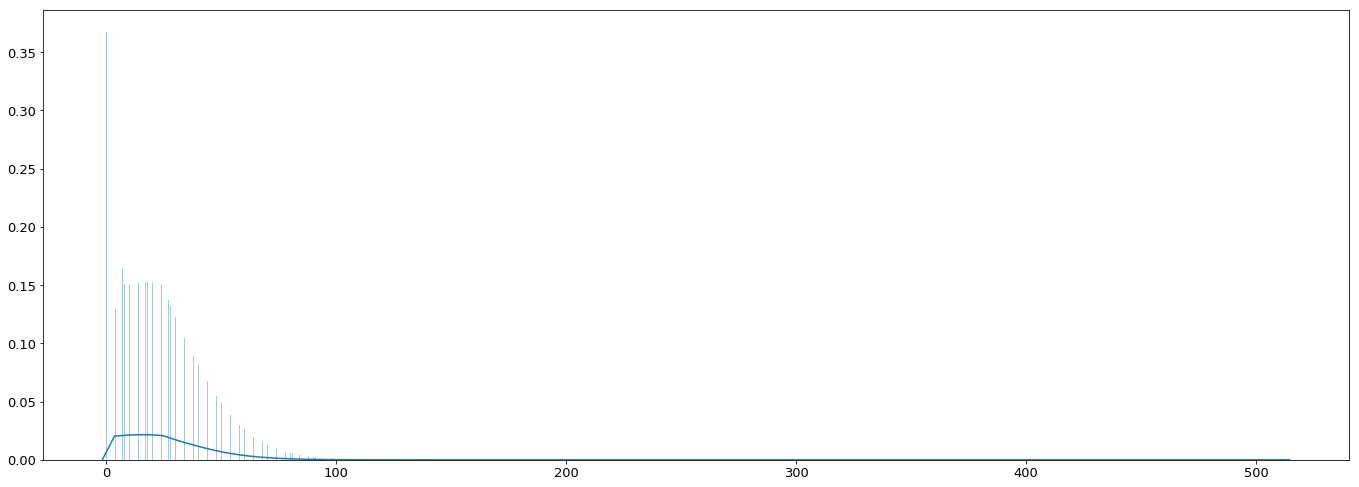

In [70]:
a4_dims = (2*11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(a=js_bgcd_bits1, ax=ax, hist=True, norm_hist=False, bins='auto')
plt.show()

sns.distplot(a=js_bgcd_bits3, ax=ax, hist=True, norm_hist=False, bins='auto')
plt.show()

In [91]:
bits1 = [x for x in js_bgcd_bits1 if x < 254]  # remove oberthur outliers
bits2 = js_bgcd_bits3
print(len(bits1), len(bits2))

from scipy import stats
stats.ks_2samp(bits1, bits2)

44734209 44734280


Ks_2sampResult(statistic=0.030239495251500943, pvalue=0.0)

In [150]:
for sp in samples_db:
    if sp['k']==5000:
        print(sp)
        break
samples_db[10000000]

{'k': 5000, 'time': 2.7442739009857178, 'd': 50868011}


{'k': 4202, 'time': 0.8068609237670898, 'd': 522670123}

In [156]:
print(min(get_d_for_cn(5000)))
print(max(get_d_for_cn(5000)))
print(min(get_d_for_cn(10000)))
print(max(get_d_for_cn(10000)))
print(min(get_d_for_cn(20000)))
print(max(get_d_for_cn(20000)))

50868011
4060990147
242752331
4294786395
829312259
4293127299


## Classpoly

In [12]:
jcp = json.load(open('/Users/dusanklinec/workspace/codesign-analysis/hilb_0.json'))['res']

In [15]:
jcpd = pd.DataFrame(jcp)

2019-02-11 15:20:38 auth43-33.fi.muni.cz matplotlib.legend[96019] WARNING No handles with labels found to put in legend.
2019-02-11 15:20:51 auth43-33.fi.muni.cz matplotlib.legend[96019] WARNING No handles with labels found to put in legend.


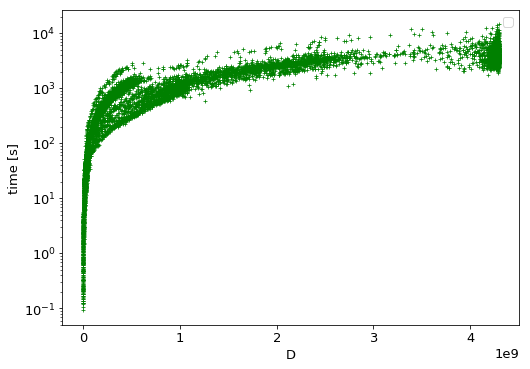

In [ ]:
SMALL_GRAPH=False
a4_dims = (0.7*11.7, 0.7*8.27) if not SMALL_GRAPH else None
palette=["g", "k"] 
cmarkers = ['+', '1']
cats = ['min','max']

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, y='time', x='d',
                #hue=d_type, hue_order=cats, style=d_type, style_order=cats,
                color='g', marker='+',
                palette=palette, markers=cmarkers,
                data=jcpd, s=10)

ax.set_xlabel("D")
ax.set_ylabel("time [s]")
ax.set(yscale="log")
legend = ax.legend()
# legend.texts[0].set_text('D type')
plt.rcParams.update({'font.size': 13})
#plt.savefig("/tmp/cp_hilbert_time_5000_logy.pdf",bbox_inches='tight', dpi=900)
plt.savefig("/tmp/cp_hilbert_time_5000_logy.png",bbox_inches='tight', dpi=900)



fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, y='time', x='k',
                #hue=d_type, hue_order=cats, style=d_type, style_order=cats,
                color='g', marker='+',
                palette=palette, markers=cmarkers,
                data=jcpd[jcpd.k <= 5000], s=10)

ax.set_xlabel("h(-D)")
ax.set_ylabel("time [s]")
ax.set(yscale="log")
legend = ax.legend()
# legend.texts[0].set_text('D type')
plt.rcParams.update({'font.size': 13})
#plt.savefig("/tmp/cp_hilbert_time_5000_2.pdf",bbox_inches='tight', dpi=900)
plt.savefig("/tmp/cp_hilbert_time_5000_2.png",bbox_inches='tight', dpi=900)

